In [47]:
import pandas as pd

#ad = pd.read_csv("airdataset.csv")
ttc = pd.read_csv("Total Tree Cover.csv")
states = ["Delhi","Gujarat","Tamil Nadu","West Bengal","Kerala","Maharashtra","Haryana"]
years = ['2001','2003','2005','2007','2009','2011','2013','2015','2017','2019']
green = []
for s in states:
    for y in years:
        green.append(ttc[y].loc[ttc['States']==s].item())
print(green)

[151, 268, 283, 292, 296, 290, 294, 299.77, 305.41, 324.44, 19188, 25532, 22336, 22625, 23173, 22783, 23073, 22574.0, 22781.0, 21769.0, 27536, 27634, 28665, 28632, 27958, 27361, 27910, 30850.0, 30952.0, 31194.0, 13957, 14074, 14682, 15357, 15126, 14678, 14557, 18916.0, 18983.0, 18908.0, 16706, 17480, 18227, 20040, 19251, 18332, 18741, 22190.0, 23280.0, 24080.0, 55751, 56185, 56454, 59872, 58223, 55944, 56618, 60186.0, 60513.0, 61584.0, 3280, 2932, 3152, 3081, 2964, 2912, 2869, 2939.0, 3003.0, 3167.0]


In [48]:
print(len(green))

70


In [49]:
ad = pd.read_csv("aircsv.csv")
aqis = []
years = [2001,2003,2005,2007,2009,2011,2013,2015,2017,2019]
for s in states:
    for y in years:
        aqi = ad['AQI'].loc[(ad['state'] == s) & (ad['year'] == y)]
        aqi = list(aqi)
        if len(aqi) == 0:
            aqi = ad['AQI'].loc[(ad['state'] == s) & (ad['year'] == y-1)] 
            aqi1 = ad['AQI'].loc[(ad['state'] == s) & (ad['year'] == y+1)]
            aqi = list(aqi)
            aqi1 = list(aqi1)
            aqi.extend(aqi1)
        aqis.append(sum(aqi)/len(aqi))
        print(s,y)
print(aqis)

Delhi 2001
Delhi 2003
Delhi 2005
Delhi 2007
Delhi 2009
Delhi 2011
Delhi 2013
Delhi 2015
Delhi 2017
Delhi 2019
Gujarat 2001
Gujarat 2003
Gujarat 2005
Gujarat 2007
Gujarat 2009
Gujarat 2011
Gujarat 2013
Gujarat 2015
Gujarat 2017
Gujarat 2019
Tamil Nadu 2001
Tamil Nadu 2003
Tamil Nadu 2005
Tamil Nadu 2007
Tamil Nadu 2009
Tamil Nadu 2011
Tamil Nadu 2013
Tamil Nadu 2015
Tamil Nadu 2017
Tamil Nadu 2019
West Bengal 2001
West Bengal 2003
West Bengal 2005
West Bengal 2007
West Bengal 2009
West Bengal 2011
West Bengal 2013
West Bengal 2015
West Bengal 2017
West Bengal 2019
Kerala 2001
Kerala 2003
Kerala 2005
Kerala 2007
Kerala 2009
Kerala 2011
Kerala 2013
Kerala 2015
Kerala 2017
Kerala 2019
Maharashtra 2001
Maharashtra 2003
Maharashtra 2005
Maharashtra 2007
Maharashtra 2009
Maharashtra 2011
Maharashtra 2013
Maharashtra 2015
Maharashtra 2017
Maharashtra 2019
Haryana 2001
Haryana 2003
Haryana 2005
Haryana 2007
Haryana 2009
Haryana 2011
Haryana 2013
Haryana 2015
Haryana 2017
Haryana 2019
[191.72543

In [50]:
print(len(aqis))

70


In [51]:
ga = pd.read_csv("forest_cover.csv")
g = []
for state in states:
    a = ga["Geographical Area_1-13"].loc[ga['State/UT']==state].item()
    g.append(int(a.replace(',','')))
print(g)

[1483, 196022, 130058, 88752, 38863, 307713, 44212]


In [52]:
r = 10
area = []
ratio = []
for a in g:
    for i in range(r):
        area.append(a)
for i in range(len(green)):
    ratio.append((green[i]/area[i])*100)
print(ratio)    

[10.182063385030343, 18.071476736345247, 19.08293998651382, 19.68981793661497, 19.95954146999326, 19.554956169925827, 19.824679703304113, 20.21375590020229, 20.59406608226568, 21.87727579231288, 9.788697187050433, 13.025068614747322, 11.394639377212762, 11.542071808266419, 11.821632265766087, 11.622675005866688, 11.7706175837406, 11.51605432043342, 11.621654712226178, 11.10538613012825, 21.172092451060294, 21.247443448307678, 22.040166694859217, 22.014793399867752, 21.496563071860248, 21.03753709883283, 21.45965646096357, 23.720186378385026, 23.798612926540468, 23.984683756477878, 15.72584279790878, 15.8576708130521, 16.5427257977285, 17.30327203893997, 17.042996214169822, 16.53821885703984, 16.40188390120786, 21.313322516675683, 21.388813773210742, 21.304308635298362, 42.98690270951805, 44.97851426806989, 46.90065100481177, 51.56575663227234, 49.535547950492756, 47.17083086740602, 48.2232457607493, 57.098010961583, 59.902735249466076, 61.96124848827934, 18.11785657414539, 18.258897089

In [55]:
from scipy.stats import pearsonr
corr1,_ = pearsonr(aqis,ratio)
print(corr1)

-0.20229019817427843


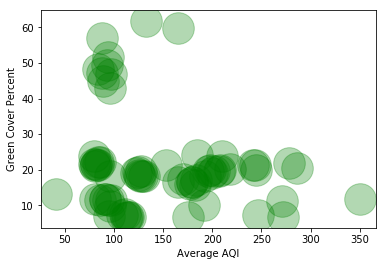

In [60]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(aqis,ratio,s = 1000, color = 'green',alpha = 0.3)
ax.set(xlabel='Average AQI' ,ylabel='Green Cover Percent')
plt.show()